In [1]:
import networkx as nx
import numpy as np
from itertools import chain, product

#borders = np.arange(300)[np.random.randint(0,2,(300,),dtype=bool)]
borders = np.array([0, 2, 5])

In [2]:
def get_coo(borders):

    edge_list = []
    for s, e in zip(borders, borders[1:]):
        
        # create fully-connected subgraph
        arr = np.arange(s, e)
        t = np.array(np.meshgrid(arr, arr)).T.reshape(-1, 2)
        t = t.T

        edge_list.append(t)

    edge_list = np.concatenate(edge_list, axis=1)

    return edge_list

%timeit get_coo(borders)

86.9 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
def get_coo(borders):
    graphs = [nx.complete_graph(range(*i),nx.DiGraph()) for i in zip(borders, borders[1:])]
    edges = nx.disjoint_union_all(graphs).edges()
    return edges

%timeit get_coo(borders)

159 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
def get_coo(borders):
    edges = chain(*[product(range(*i),repeat=2) for i in zip(borders, borders[1:])])
    return list(edges)

%timeit get_coo(borders)

4.23 µs ± 788 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
def get_coo(borders):
    bi_gram = np.lib.stride_tricks.as_strided(borders, 
                                          shape = (borders.shape[0]-1,2), 
                                          strides = (borders.strides[0],borders.strides[0]))
    
    edges = chain(*[product(i,i) for i in map(np.arange, *bi_gram)])
    return list(edges)

%timeit get_coo(borders)

17.1 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
def get_coo(borders):
    graphs = [nx.from_numpy_matrix(np.ones((i,i))).to_directed() for i in np.diff(borders)]
    edges = nx.disjoint_union_all(graphs).edges()
    return edges

%timeit get_coo(borders)

239 µs ± 3.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
import numpy as np
from itertools import product, chain

def get_coo(borders):
    edges = chain(*[product(range(*i),repeat=2) for i in zip(borders, borders[1:])])
    return list(edges)

np.array(get_coo(borders)).T

array([[0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
       [0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 4]])

In [8]:
from collections import defaultdict

l= [{'symbol_name': 'AUDIOUSDT', 'timeframe_name': '1m', 'scenario': 1, 'continuity': 1},
    {'symbol_name': 'AUDIOUSDT', 'timeframe_name': '3m', 'scenario': 2, 'continuity': 1},
    {'symbol_name': 'AUDIOUSDT', 'timeframe_name': '5m', 'scenario': 1, 'continuity': 1},
    {'symbol_name': 'AUDIOUSDT', 'timeframe_name': '15m', 'scenario': 1, 'continuity': 1},
    {'symbol_name': 'AUDIOUSDT', 'timeframe_name': '30m', 'scenario': 2, 'continuity': 1},
    {'symbol_name': 'AUDIOUSDT', 'timeframe_name': '1h', 'scenario': 2, 'continuity': 1},
    {'symbol_name': 'TRBUSDT', 'timeframe_name': '1m', 'scenario': -2, 'continuity': 0},
    {'symbol_name': 'TRBUSDT', 'timeframe_name': '3m', 'scenario': 2, 'continuity': 1},
    {'symbol_name': 'TRBUSDT', 'timeframe_name': '5m', 'scenario': 1, 'continuity': -1},
    {'symbol_name': 'TRBUSDT', 'timeframe_name': '15m', 'scenario': 1, 'continuity': -1},
    {'symbol_name': 'TRBUSDT', 'timeframe_name': '30m', 'scenario': 2, 'continuity': 1},
    {'symbol_name': 'TRBUSDT', 'timeframe_name': '1h', 'scenario': 2, 'continuity': 1}]


d = defaultdict(dict)
for i in l:
    k = {'symbol_name':i['symbol_name'],
         i['timeframe_name']+'_scenario':i['scenario'], 
         i['timeframe_name']+'_continuity':i['continuity']}
    d[i['symbol_name']].update(k)
    
output = list(d.values())
print(output)

[{'symbol_name': 'AUDIOUSDT', '1m_scenario': 1, '1m_continuity': 1, '3m_scenario': 2, '3m_continuity': 1, '5m_scenario': 1, '5m_continuity': 1, '15m_scenario': 1, '15m_continuity': 1, '30m_scenario': 2, '30m_continuity': 1, '1h_scenario': 2, '1h_continuity': 1}, {'symbol_name': 'TRBUSDT', '1m_scenario': -2, '1m_continuity': 0, '3m_scenario': 2, '3m_continuity': 1, '5m_scenario': 1, '5m_continuity': -1, '15m_scenario': 1, '15m_continuity': -1, '30m_scenario': 2, '30m_continuity': 1, '1h_scenario': 2, '1h_continuity': 1}]


In [11]:
n = 5

[[i+1]*(n-i)+[0]*(i) for i in reversed(range(0,n))]

[[5, 0, 0, 0, 0],
 [4, 4, 0, 0, 0],
 [3, 3, 3, 0, 0],
 [2, 2, 2, 2, 0],
 [1, 1, 1, 1, 1]]

In [13]:
def compare_lists_same(list3, list4):
    common =[j for j in list4 if j in list3]
    return common

A = ['beef','chicken','steak','fish','plants', 1, 2]
B = ['plants','steak','cheese', 1, 2, 3, 4, 5]

ignore_case = False


def new_print(l):
    print([i for i in l if isinstance(i,str)])

new_print(A)
new_print(B)

C = compare_lists_same (A,B)

new_print(C)

['beef', 'chicken', 'steak', 'fish', 'plants']
['plants', 'steak', 'cheese']
['plants', 'steak']


In [18]:
data = np.array([[0.75, 0.05, 0.1, 0.2],
                 [0.4, 0.3, 0.2, 0.1]])

labels = np.array([3,1])

np.take_along_axis(data, labels[:,None], axis=1).ravel()

array([0.2, 0.3])

In [20]:
arr = np.array([[[44, 47, 64, 67, 67],
                 [ 9, 83, 21, 36, 87],
                 [70, 88, 88, 12, 58],
                 [65, 39, 87, 46, 88],
                 [81, 37, 25, 77, 72]],
         
                [[ 9, 20, 80, 69, 79],
                 [47, 64, 82, 99, 88],
                 [49, 29, 19, 19, 14],
                 [39, 32, 65,  9, 57],
                 [32, 31, 74, 23, 35]]])


idx = [1,3,4]

ixgrid = np.ix_(idx,idx)
arr[:,ixgrid[0],ixgrid[1]]

array([[[83, 36, 87],
        [39, 46, 88],
        [37, 77, 72]],

       [[64, 99, 88],
        [32,  9, 57],
        [31, 23, 35]]])

In [22]:
import pandas as pd

In [ ]:
column_1  column_2  column_3
   45         3          2
   NaN        4          6
   NaN        7          2
   37         1          1 
   NaN        6          4
   NaN        2          7
   NaN        4          5
    45        2          2
   NaN        1          1
   NaN        3          3

In [23]:
df = pd.read_clipboard()

df['column_1'] = df['column_1'].ffill()
print(df.groupby((df['column_1']!=df['column_1'].shift()).cumsum()).mean().reset_index(drop=True))

   column_1  column_2  column_3
0      45.0  4.666667  3.333333
1      37.0  3.250000  4.250000
2      45.0  2.000000  2.000000


In [24]:
import pandas as pd
import numpy as np

dataset0 = pd.DataFrame(np.random.random((100,3)))
dataset1 = pd.DataFrame(np.random.random((100,3)))
dataset2 = pd.DataFrame(np.random.random((100,3)))
dataset3 = pd.DataFrame(np.random.random((100,3)))

samples = [eval('dataset'+str(i)).sample(3) for i in range(4)]
print(pd.concat(samples))

           0         1         2
0   0.381519  0.057224  0.160251
6   0.138984  0.689423  0.422007
71  0.487369  0.815396  0.341601
78  0.068916  0.988259  0.498557
71  0.139149  0.773157  0.615749
76  0.560852  0.538044  0.264561
89  0.377186  0.296929  0.797931
3   0.575728  0.100556  0.859895
51  0.476764  0.895649  0.480793
70  0.204346  0.188661  0.287836
0   0.134445  0.225171  0.529953
29  0.385063  0.109980  0.731864


In [25]:
a = [[1,2],
     [3,4]]

b = [[5,6],
     [7,8]]

c = [[[1,5],[2,6]],
     [[3,7],[4,8]]]

d = [[9,10],
     [11,12]]

e = [[[1,5,9],[2,6,10]],
     [[3,7,11],[4,8,12]]]


a = np.array(a)
b = np.array(b)
a = np.array(a)
b = np.array(b)

inp = [a,b,d,a,b,d]
l = []

for i in inp:
    l.append(i)
    print(np.dstack(l))
    print('-------')

[[[1]
  [2]]

 [[3]
  [4]]]
-------
[[[1 5]
  [2 6]]

 [[3 7]
  [4 8]]]
-------
[[[ 1  5  9]
  [ 2  6 10]]

 [[ 3  7 11]
  [ 4  8 12]]]
-------
[[[ 1  5  9  1]
  [ 2  6 10  2]]

 [[ 3  7 11  3]
  [ 4  8 12  4]]]
-------
[[[ 1  5  9  1  5]
  [ 2  6 10  2  6]]

 [[ 3  7 11  3  7]
  [ 4  8 12  4  8]]]
-------
[[[ 1  5  9  1  5  9]
  [ 2  6 10  2  6 10]]

 [[ 3  7 11  3  7 11]
  [ 4  8 12  4  8 12]]]
-------


In [28]:
l = [[{'id': 123456,
      'name': 'John',
      'age': 22,
      'pet': None,
      'gender': 'male',
      'result': [{'id': 'vEo0PIYPEE',
        'type': 'choices',
        'value': {'choices': ['Same Person']},
        'to_name': 'image',
        'from_name': 'person_evaluation'}]}],

    [{'id': 123457,
      'name': 'May',
      'age': 21,
      'pet': None,
      'gender': 'female',
      'result': [{'id': 'zTHYuKIOQ',
        'type': 'choices',
        'value': {'choices': ['Different Person']},
        'to_name': 'image',
        'from_name': 'person_evaluation'}]}]]

In [31]:
df = pd.DataFrame({'labels':l})
df

,labels
0,"[{'id': 123456, 'name': 'John', 'age': 22, 'pe..."
1,"[{'id': 123457, 'name': 'May', 'age': 21, 'pet..."


[[{'id': 123456,
   'name': 'John',
   'age': 22,
   'pet': None,
   'gender': 'male',
   'result': [{'id': 'vEo0PIYPEE',
     'type': 'choices',
     'value': {'choices': ['Same Person']},
     'to_name': 'image',
     'from_name': 'person_evaluation'}]}],
 [{'id': 123457,
   'name': 'May',
   'age': 21,
   'pet': None,
   'gender': 'female',
   'result': [{'id': 'zTHYuKIOQ',
     'type': 'choices',
     'value': {'choices': ['Different Person']},
     'to_name': 'image',
     'from_name': 'person_evaluation'}]}]]

In [ ]:
ID  Q1  Q2  QN
1   1   1   0
2   1   1   1
3   0   0   1
4   0   1   0

In [49]:
df = pd.read_clipboard()

In [52]:
df

,ID,Q1,Q2,QN
0,1,1,1,0
1,2,1,1,1
2,3,0,0,1
3,4,0,1,0


In [72]:
df.melt('ID', ['Q1','Q2','QN'], 'Question', 'Answer')

,ID,Question,Answer
0,1,Q1,1
1,2,Q1,1
2,3,Q1,0
3,4,Q1,0
4,1,Q2,1
5,2,Q2,1
6,3,Q2,0
7,4,Q2,1
8,1,QN,0
9,2,QN,1


In [ ]:
# desired output
animals = {
 "animals": {
   "dog": {
     "legs": 4,
   },
  }, 
}

In [73]:
dog_path = ["animals", "dog"]

dog_content = {
  "legs": 4,
}

In [77]:
[i for i in dog_path]

['animals', 'dog']

In [80]:
a = {'type': 'Low', 'count': 184} 
b = {'type': 'Low', 'count': 186} 
c = {'type': 'Low', 'count': 97} 
d = {'type': 'Medium', 'count': 1000} 
e = {'type': 'High', 'count': 2000} 

In [81]:
from collections import defaultdict

output = defaultdict(list)
l = [a,b,c,d,e]

for i in l:
    

{'type': 'Low', 'count': 184}
{'type': 'Low', 'count': 186}
{'type': 'Low', 'count': 97}
{'type': 'Medium', 'count': 1000}
{'type': 'High', 'count': 2000}


In [87]:
k

array([[23, 33, 27, 32],
       [52, 30, 57, 11],
       [19,  3, 34, 59],
       [37, 30, 62, 20]])

In [88]:
k.strides

(32, 8)

In [91]:
x,y = 2,2

In [115]:
k = np.random.randint(1,64,64).reshape(8,8)

#Strides
x,y = 2,2

shape = k.shape[0]//x, k.shape[1]//y, x, y  
strides = k.strides[0]*x, k.strides[1]*y, k.strides[0], k.strides[1]

print('expected shape:',shape)
print('required strides:',strides)

convolve = np.lib.stride_tricks.as_strided(k, shape=shape, strides=strides)
print('convolution output shape:',convolve.shape)

maxpool = np.mean(convolve, axis=(-1,-2))
print('maxpooled output shape:',maxpool.shape)


print(' ')
print('Input matrix:')
print(k)
print('--------')
print('Output matrix:')
print(maxpool)

expected shape: (4, 4, 2, 2)
required strides: (128, 16, 64, 8)
convolution output shape: (4, 4, 2, 2)
maxpooled output shape: (4, 4)
 
Input matrix:
[[15 52 61 54 53 17 30 15]
 [26 36 20 48  8 14 59  3]
 [21 53 34 31 40 30 33 44]
 [60 60 44 17 29  6 52 42]
 [47 54 19 25 19  5 28 16]
 [ 9 38  3 52  3 22 36 51]
 [20 40 45 33 13  5 27 50]
 [20 11 15 57 50  1 38 17]]
--------
Output matrix:
[[32.25 45.75 23.   26.75]
 [48.5  31.5  26.25 42.75]
 [37.   24.75 12.25 32.75]
 [22.75 37.5  17.25 33.  ]]


In [122]:
first_window = [[19,32],
                 [4,19]]

np.mean(first_window)

18.5

18.5

In [127]:
import numpy as np

# use 2-by-3 size to prevent some subtle indexing errors
arr = np.random.randint(1, 64, 64).reshape(8, 8)

m, n = arr.shape
pooled = arr.reshape(m//2, 2, n//2, 2).mean((1, 3))

In [128]:
arr

array([[ 3, 50, 16, 47, 16,  2, 54, 18],
       [11, 26, 27,  4, 62, 12, 16, 25],
       [19, 25, 28, 54, 46,  3,  2, 20],
       [57, 30, 47, 46, 19, 12, 46,  8],
       [30,  4,  3, 46, 50, 30, 23, 58],
       [59, 52, 10, 61, 41, 46, 43, 62],
       [21, 26, 30, 45, 14,  3, 24, 33],
       [42, 48, 26,  8, 17, 55, 42, 32]])

In [132]:
my_list = [1,2,3,4,2,3]

Epoch 1/3
180/180 [==============================] - 0s 1ms/step - loss: 0.4628 - mean_squared_error: 0.4628
Epoch 2/3
180/180 [==============================] - 0s 726us/step - loss: 0.4093 - mean_squared_error: 0.4093
Epoch 3/3
180/180 [==============================] - 0s 690us/step - loss: 0.3792 - mean_squared_error: 0.3792


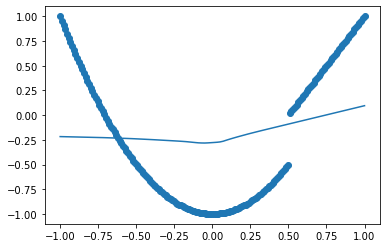

In [148]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

f1 = lambda x: ((x < .5) * np.power(x, 2) + (x > .5) * x) * 2 -1
x = np.linspace(-1, 1, 180).reshape(-1,1)
y = f1(x).reshape(-1, 1)

model = models.Sequential()
model.add(layers.Dense(100, activation=tf.keras.activations.relu, input_shape=(1,)))
model.add(layers.Dense(1, activation=tf.keras.activations.linear))

model.compile(loss=tf.keras.losses.mean_squared_error, 
              optimizer=tf.keras.optimizers.SGD(0.001), 
              metrics=[tf.keras.losses.mean_squared_error])

model.fit(x, y, batch_size=1, epochs=3)
xtest = np.linspace(-1, 1, 100).reshape(-1, 1)
ytest = model.predict(xtest)

plt.scatter(x, y)
plt.plot(xtest, ytest)
plt.show()

In [150]:
def foo(y):
    return lambda x: x(x(y))
def bar(x):
    return lambda y: x(y)
print((bar)(bar)(foo)(2)(lambda x:x+1))

4


In [155]:
from scipy import spatial

a = np.array([1,2,3,4,10])
b = np.array([1,2,3,4,5])

print(spatial.distance.cosine(a,b))

0.053900166417467865


In [156]:
from scipy import spatial

a = np.array([1,1,1,1,1])
b = np.array([1,2,3,4,5])

print(spatial.distance.cosine(a,b))

0.09546596626670911


In [159]:
import numpy as np

a = np.arange(100)
idx = np.linspace(0, 100, 9).astype(np.int16)
for idx_start, idx_end in zip(idx[:-1], idx[1:]):
    print(a[idx_start:idx_end],'---', a[idx_start:idx_end].shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11] --- (12,)
[12 13 14 15 16 17 18 19 20 21 22 23 24] --- (13,)
[25 26 27 28 29 30 31 32 33 34 35 36] --- (12,)
[37 38 39 40 41 42 43 44 45 46 47 48 49] --- (13,)
[50 51 52 53 54 55 56 57 58 59 60 61] --- (12,)
[62 63 64 65 66 67 68 69 70 71 72 73 74] --- (13,)
[75 76 77 78 79 80 81 82 83 84 85 86] --- (12,)
[87 88 89 90 91 92 93 94 95 96 97 98 99] --- (13,)


In [164]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
PARTS_REORDERD = [{"part": 23,
                  "subpart_1": {"image": "first"},
                  "subpart_2": {"image": None},
                  "subpart_3": {"image": "third"},
                  "subpart_4": {"image": None},
                  "subpart_5": {"image": "fifth"},  
                 },
                 {  
                  "part": 12,
                  "subpart_1": {"image": None},
                  "subpart_2": {"image": None},
                  "subpart_3": {"image": "THIRD"},
                  "subpart_4": {"image": "FOURTH"},
                  "subpart_5": {"image": "FIFTH"},  
                 }]

In [165]:
PARTS = [{"part": 23, "subparts": [{"subpart": 1, "image": "first"},
                                   {"subpart": 3, "image": "third"}, 
                                   {"subpart": 5, "image": "fifth"}]}, 
         {"part": 12, "subparts": [{"subpart": 4, "image": "FOURTH"}, 
                                   {"subpart": 3, "image": "THIRD"}, 
                                   {"subpart": 5, "image": "FIFTH"}]}]

In [166]:
PARTS[0]

{'part': 23,
 'subparts': [{'subpart': 1, 'image': 'first'},
  {'subpart': 3, 'image': 'third'},
  {'subpart': 5, 'image': 'fifth'}]}

In [186]:
[[tuple(j.values()) for j in i['subparts']] for i in PARTS]

[[(1, 'first'), (3, 'third'), (5, 'fifth')],
 [(4, 'FOURTH'), (3, 'THIRD'), (5, 'FIFTH')]]

In [188]:
dict.fromkeys(range(1,6))

{1: None, 2: None, 3: None, 4: None, 5: None}

In [189]:
dict.fromkeys(range(1,6))

{1: None, 2: None, 3: None, 4: None, 5: None}

In [190]:
food_calories = {"Burger": 400, "Ice Cream": 350, "Cake": 640, "Chicken": 400, "Rice": 250, "Salad": 40, "Fanta": 170, "Coke": 200, "Beef": 350}

In [191]:
food_calories

{'Burger': 400,
 'Ice Cream': 350,
 'Cake': 640,
 'Chicken': 400,
 'Rice': 250,
 'Salad': 40,
 'Fanta': 170,
 'Coke': 200,
 'Beef': 350}

In [195]:
min_calories = min(zip(food_calories.values(), food_calories.keys()))
max_calories = max(zip(food_calories.values(), food_calories.keys()))
print("min_calories:",min_calories)
print("max_calories:",max_calories)

values = food_calories.values()
total = sum(values)
print(total)

def food_calories_sum():
    for k in food_calories:
        return k

min_calories: (40, 'Salad')
max_calories: (640, 'Cake')
2800


In [196]:
food_calories_sum()

'Burger'

In [201]:
l = ["Ice Cream", "Chicken", "Beef"]

def food_calories_sum(l):
    return sum([food_calories.get(i,0) for i in l])

food_calories_sum(l)

1100

              A    B
2010-09-05  NaN  NaN
2010-10-04  NaN  4.0
2019-10-04  7.0  7.0


In [267]:
df = pd.read_clipboard()

In [271]:
df.index = pd.to_datetime(df.index)

In [272]:
print(df)

              A    B
2010-10-04  NaN  4.0
2010-10-05  3.0  5.0
2010-10-06  5.0  2.0
2010-09-05  NaN  NaN
2010-09-05  3.0  5.0
2010-09-06  5.0  2.0
2019-10-04  7.0  7.0
2019-10-05  3.0  5.0
2019-10-06  5.0  2.0


In [274]:
pd.Grouper(freq="M")

DatetimeIndex(['2010-10-04', '2010-10-05', '2010-10-06', '2010-09-05',
               '2010-09-05', '2010-09-06', '2019-10-04', '2019-10-05',
               '2019-10-06'],
              dtype='datetime64[ns]', freq=None)

,A,B
2010-09-05,NaN,NaN
2010-10-04,NaN,4.0
2019-10-04,7.0,7.0


In [ ]:
    time heartrate
    0   97
    3   105
    6   105
    8   111
    11  111
    13  114
    16  115

In [277]:
df = pd.read_clipboard()
df

,time,heartrate
0,0,97
1,3,105
2,6,105
3,8,111
4,11,111
5,13,114
6,16,115


In [282]:
vmin, vmax = df['time'].min(), df['time'].max()
print(df.set_index('time').reindex(range(vmin, vmax+1)).ffill().reset_index())




    time  heartrate
0      0       97.0
1      1       97.0
2      2       97.0
3      3      105.0
4      4      105.0
5      5      105.0
6      6      105.0
7      7      105.0
8      8      111.0
9      9      111.0
10    10      111.0
11    11      111.0
12    12      111.0
13    13      114.0
14    14      114.0
15    15      114.0
16    16      115.0


In [1]:
import pandas as pd

In [ ]:
ID    things
1     pen,car,robot
2     lamp,jug,phone
3     switch,pen,book

In [2]:
df = pd.read_clipboard()
df

,ID,things
0,1,"pen,car,robot"
1,2,"lamp,jug,phone"
2,3,"switch,pen,book"


0            
level_1       0    1      2
level_0                    
0           pen  car  robot
1          lamp  jug  phone
2        switch  pen   book

In [27]:
from timeit import timeit
import numpy as np

0      car,pen,robot
1     jug,lamp,phone
2    book,pen,switch
Name: things, dtype: object

In [40]:
timeit("df.things.apply(lambda x: ','.join(sorted(x.split(','))))", number=10000, globals=globals())

1.8124373129999185

In [41]:
timeit("df['things'].str.split(',').map(np.sort).str.join(',')", number=10000, globals=globals())

5.786279340999954

In [42]:
timeit("df.things.str.split(',').map(sorted).str.join(',')", number=10000, globals=globals())

6.355722171000025

In [53]:
real_loss = tf.losses.BinaryCrossentropy()
fake_loss = tf.losses.BinaryCrossentropy()

In [51]:
import tensorflow as tf
import tensorflow.keras.backend as kb
from tensorflow.keras import layers, Model

In [54]:
inp = layers.Input((10,))
x = layers.Dense(15)(inp)
out = layers.Dense(3)(inp)

model = Model(inp, out)
model.compile(loss=[real_loss, fake_loss], loss_weights=[1,1])

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [61]:
from django.template import Template, Context
from django.conf import settings
settings.configure()

RuntimeError: Settings already configured.

In [60]:
 # We have to do this to use django templates standalone - see
# http://stackoverflow.com/questions/98135/how-do-i-use-django-templates-without-the-rest-of-django

# Our template. Could just as easily be stored in a separate file
template = """
<html>
<head>
<title>Template {{ title }}</title>
</head>
<body>
Body with {{ mystring }}.
</body>
</html>
"""

t = Template(template)
c = Context({"title": "title from code",
             "mystring":"string from code"})
print(t.render(c))

ImproperlyConfigured: No DjangoTemplates backend is configured.

In [62]:
import pandas as pd

series = [('Stranger Things', 3, 'Millie'),
          ('Game of Thrones', 8, 'Emilia'), 
          ('La Casa De Papel', 4, 'Sergio'),
          ('Westworld', 3, 'Evan Rachel'), 
          ('Stranger Things', 3, 'Todd'),
          ('La Casa De Papel', 4, 'Sergio')]

# Create a DataFrame object
df = pd.DataFrame(series, columns=['Name', 'Seasons', 'Actor'])

In [ ]:
Stranger Things, 3, Millie
Stranger Things, 3, Todd

In [ ]:
.explode().reset_index())

In [93]:
df.groupby(['Name'])['Actor'].apply(set)

Name
Game of Thrones           {Emilia}
La Casa De Papel          {Sergio}
Stranger Things     {Millie, Todd}
Westworld            {Evan Rachel}
Name: Actor, dtype: object

In [75]:
print(df[~df[['Name','Actor']].duplicated(keep='first')].sort_values('Name'))

               Name  Seasons        Actor
1   Game of Thrones        8       Emilia
2  La Casa De Papel        4       Sergio
0   Stranger Things        3       Millie
4   Stranger Things        3         Todd
3         Westworld        3  Evan Rachel


,Name,Seasons,Actor
0,Stranger Things,3,Millie
1,Game of Thrones,8,Emilia
2,La Casa De Papel,4,Sergio
3,Westworld,3,Evan Rachel
4,Stranger Things,3,Todd
5,La Casa De Papel,4,Sergio


In [111]:
idx = df.groupby('Name')['Actor'].transform(lambda x: len(set(x)))>1
print(df[idx])

              Name  Seasons   Actor
0  Stranger Things        3  Millie
4  Stranger Things        3    Todd

              Name  Seasons   Actor
0  Stranger Things        3  Millie
4  Stranger Things        3    Todd


In [104]:
conditions = df.groupby('Name')['Actor'].apply(lambda x:len(set(x))>1).values
conditions

array([False, False,  True, False])

In [133]:
from collections import defaultdict

n = [1,2,3,4]
d = defaultdict(list)
d

defaultdict(list, {})

In [124]:
n = [1,2,3,4]
d = {k:[] for k in n}

d[1] is d[2]

False

In [126]:
d

{1: [777], 2: [], 3: [], 4: []}

In [ ]:
            ts_code      low     high
2021-08-01  881105.TI   1485.0  1629.0
2021-08-01  885452.TI   2216.0  2391.0
2021-08-01  885525.TI   7427.0  8552.0
2021-08-01  885641.TI   621.0   671.0
2021-08-08  881105.TI   1496.0  1623.0
2021-08-08  885452.TI   2297.0  2406.0
2021-08-08  885525.TI   7300.0  7868.0
2021-08-08  885641.TI   668.0   691.0
2021-08-15  881105.TI   1606.0  1776.0
2021-08-15  885452.TI   2352.0  2459.0
2021-08-15  885525.TI   7525.0  8236.0
2021-08-15  885641.TI   685.0   719.0
2021-08-22  881105.TI   1656.0  1804.0
2021-08-22  885452.TI   2329.0  2415.0
2021-08-22  885525.TI   7400.0  8270.0
2021-08-22  885641.TI   691.0   720.0

In [134]:
df = pd.read_clipboard()
df

,ts_code,low,high
2021-08-01,881105.TI,1485.0,1629.0
2021-08-01,885452.TI,2216.0,2391.0
2021-08-01,885525.TI,7427.0,8552.0
2021-08-01,885641.TI,621.0,671.0
2021-08-08,881105.TI,1496.0,1623.0
2021-08-08,885452.TI,2297.0,2406.0
2021-08-08,885525.TI,7300.0,7868.0
2021-08-08,885641.TI,668.0,691.0
2021-08-15,881105.TI,1606.0,1776.0
2021-08-15,885452.TI,2352.0,2459.0


In [151]:
df.columns

Index(['ts_code', 'low', 'high'], dtype='object')

In [135]:
df.groupby('ts_code')['high'].transform('idxmax')

2021-08-01    2021-08-22
2021-08-01    2021-08-15
2021-08-01    2021-08-01
2021-08-01    2021-08-22
2021-08-08    2021-08-22
2021-08-08    2021-08-15
2021-08-08    2021-08-01
2021-08-08    2021-08-22
2021-08-15    2021-08-22
2021-08-15    2021-08-15
2021-08-15    2021-08-01
2021-08-15    2021-08-22
2021-08-22    2021-08-22
2021-08-22    2021-08-15
2021-08-22    2021-08-01
2021-08-22    2021-08-22
Name: high, dtype: object

In [164]:
df[df.groupby('ts_code')['high'].transform(lambda x: (x.index>=x.idxmax('high')))]

,ts_code,low,high
2021-08-01,885525.TI,7427.0,8552.0
2021-08-08,885525.TI,7300.0,7868.0
2021-08-15,885452.TI,2352.0,2459.0
2021-08-15,885525.TI,7525.0,8236.0
2021-08-22,881105.TI,1656.0,1804.0
2021-08-22,885452.TI,2329.0,2415.0
2021-08-22,885525.TI,7400.0,8270.0
2021-08-22,885641.TI,691.0,720.0


In [159]:
df1 = df.reset_index()
df1 = df[df.index >= df.groupby('ts_code')['high'].transform('idxmax')]
out = df1[df1.groupby('ts_code').cumcount()<=1]
out

,ts_code,low,high
2021-08-01,885525.TI,7427.0,8552.0
2021-08-08,885525.TI,7300.0,7868.0
2021-08-15,885452.TI,2352.0,2459.0
2021-08-22,881105.TI,1656.0,1804.0
2021-08-22,885452.TI,2329.0,2415.0
2021-08-22,885641.TI,691.0,720.0


In [ ]:
out
              ts_code     low    high
2021-08-01  885525.TI  7427.0  8552.0
2021-08-08  885525.TI  7300.0  7868.0
2021-08-15  885452.TI  2352.0  2459.0
2021-08-22  881105.TI  1656.0  1804.0
2021-08-22  885452.TI  2329.0  2415.0
2021-08-22  885641.TI   691.0   720.0

In [ ]:
df.apply(df.columns.repeat, axis=1).explode()

In [165]:
data = [{'ID': 1, 'A': 3, 'B': 1, 'C': 2, 'D': 1, 'E': 0},
        {'ID': 2, 'A': 0, 'B': 1, 'C': 2, 'D': 5, 'E': 2},
        {'ID': 3, 'A': 2, 'B': 2, 'C': 5, 'D': 3, 'E': 10}]

df = pd.DataFrame(data)

In [167]:
df

,ID,A,B,C,D,E
0,1,3,1,2,1,0
1,2,0,1,2,5,2
2,3,2,2,5,3,10


In [183]:
df1

,A,B,C,D,E
ID,,,,,
1,3,1,2,1,0
2,0,1,2,5,2
3,2,2,5,3,10


In [178]:
df1 = df.set_index('ID')
df1.apply(df1.columns.repeat, axis=1)

ID
1    Index(['A', 'A', 'A', 'B', 'C', 'C', 'D'], dty...
2    Index(['B', 'C', 'C', 'D', 'D', 'D', 'D', 'D',...
3    Index(['A', 'A', 'B', 'B', 'C', 'C', 'C', 'C',...
dtype: object

In [187]:
df1.columns.repeat([1,2,1,2,0])

Index(['A', 'B', 'B', 'C', 'D', 'D'], dtype='object')

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(1, 100)))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(32, return_sequences=False))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1, activation = 'linear'))

In [188]:
from tensorflow.keras import layers, Model, utils

In [231]:
inp = layers.Input((100,1))
x = layers.MultiHeadAttention(1,2,1)(inp, inp)
x = layers.LSTM(32, return_sequences=True)(x)

In [232]:
model = Model(inp, x)
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_18 (MultiH (None, 100, 1)       12          input_26[0][0]                   
                                                                 input_26[0][0]                   
__________________________________________________________________________________________________
lstm_22 (LSTM)                  (None, 100, 32)      4352        multi_head_attention_18[0][0]    
Total params: 4,364
Trainable params: 4,364
Non-trainable params: 0
__________________________________________________________________________________________________


In [267]:
b

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [270]:
a = np.array([[1,2,3,4],[5,6,7,8]])
b = a.T

arr1 = a.reshape((-1,1))
print('Reshape of original is a view:', np.shares_memory(a, arr1))

print('Transpose sharing memory:', np.shares_memory(a,b))

arr2 = b.reshape((-1,1))
print('Reshape of transpose is a copy:', not np.shares_memory(b, arr2))

Reshape of original is a view: True
Transpose sharing memory: True
Reshape of transpose is a copy: True


In [272]:
def func(np_array):
    try:
        np_array.astype(float)
        return True
    except:
        return False

b = np.array([[1,2,'Aff'], [4,5,8], [7,8,9]])
print(np.apply_along_axis(np.can_cast, axis=0, arr=b, to='float', casting= 'safe'))
print(np.apply_along_axis(np.can_cast, axis=0, arr=b, to='float', casting= 'unsafe'))
print(np.apply_along_axis(func, axis=0, arr=b))

[False False False]
[ True  True  True]
[ True  True False]


In [277]:
[func(i) for i in b.T]

[True, True, False]

In [285]:
[np.can_cast(i, 'float', 'same_kind') for i in b.T]

[False, False, False]

In [286]:
import numpy as np

In [331]:
def lat_long_offset(lat, lon, x, y):
    '''
    lat, lon : Provide lat lon coordinates
    x, y : Provide offset of x and y on lat and long respectively
           This needs to be in meters!
           
    The approximation is taken from an aviation formula from this stack exchange 
    https://gis.stackexchange.com/questions/2951/algorithm-for-offsetting-a-latitude-longitude-by-some-amount-of-meters
    '''
       
    #Earth’s radius, sphere
    R=6378137

    #Coordinate offsets in radians
    dLat = x/R
    dLon = y/(R*np.cos(np.pi*lat/180))

    #OffsetPosition, decimal degrees
    latO = lat + dLat * 180/np.pi
    lonO = lon + dLon * 180/np.pi
    
    return latO, lonO

lat_long_offset_vec = np.vectorize(lat_long_offset)

def get_mesh(lat, lon, dist, coors):
    #calculate min and max range for coordinates over an axis
    mini, maxi = -dist*coors, dist*coors
    
    #calculate number of points over an axis
    n_coord = coors*2+1
    
    #create an axis from min to max value with required number of coordinates
    axis = np.linspace(mini, maxi, n_coord)
    
    #create an "offset_grid" for X and Y values for both axis. 
    X, Y = np.meshgrid(axis, axis)

    #calcualte offset coordinates for "offset_grid" in meters
    mesh = lat_long_offset_vec(lat, lon, X, Y)
    
    #Transpose to get the (x,y) values for the offset_grid's shape
    mesh_x_y_format = np.stack(mesh).transpose(1,2,0)
    return mesh_x_y_format

output = get_mesh(50, -10, 100, 2)

print('Shape of output grid:', output.shape)
print('Note: 2 values (x,y) for each point in the expected (5,5) grid')

print('')
print('Output coordinates')
print(output)

Shape of output grid: (5, 5, 2)
Note: 2 values (x,y) for each point in the expected (5,5) grid

Output coordinates
[[[ 49.99820337 -10.00279506]
  [ 49.99910168 -10.00279506]
  [ 50.         -10.00279506]
  [ 50.00089832 -10.00279506]
  [ 50.00179663 -10.00279506]]

 [[ 49.99820337 -10.00139753]
  [ 49.99910168 -10.00139753]
  [ 50.         -10.00139753]
  [ 50.00089832 -10.00139753]
  [ 50.00179663 -10.00139753]]

 [[ 49.99820337 -10.        ]
  [ 49.99910168 -10.        ]
  [ 50.         -10.        ]
  [ 50.00089832 -10.        ]
  [ 50.00179663 -10.        ]]

 [[ 49.99820337  -9.99860247]
  [ 49.99910168  -9.99860247]
  [ 50.          -9.99860247]
  [ 50.00089832  -9.99860247]
  [ 50.00179663  -9.99860247]]

 [[ 49.99820337  -9.99720494]
  [ 49.99910168  -9.99720494]
  [ 50.          -9.99720494]
  [ 50.00089832  -9.99720494]
  [ 50.00179663  -9.99720494]]]


(5, 5, 2)

In [333]:
axis = np.linspace(-10, 10, 3)



mini, maxi = -dist*coors, dist*coors
#create an "offset_grid" for X and Y values for both axis. 
X, Y = np.meshgrid(axis, axis)

X, Y

(array([[-10.,   0.,  10.],
        [-10.,   0.,  10.],
        [-10.,   0.,  10.]]),
 array([[-10., -10., -10.],
        [  0.,   0.,   0.],
        [ 10.,  10.,  10.]]))

In [ ]:
    #calculate min and max range for coordinates over an axis
    mini, maxi = -dist*coors, dist*coors
    
    #calculate number of points over an axis
    n_coord = coors*2+1
    
    #create an axis from min to max value with required number of coordinates
    axis = np.linspace(mini, maxi, n_coord)
    
    #create an "offset_grid" for X and Y values for both axis. 
    X, Y = np.meshgrid(axis, axis)

    #calcualte offset coordinates for "offset_grid" in meters
    mesh = lat_long_offset_vec(lat, lon, X, Y)
    
    #Transpose to get the (x,y) values for the offset_grid's shape
    mesh_x_y_format = np.stack(mesh).transpose(1,2,0)

In [ ]:
def get_bounding_box(lat, lon, meters_between_coor, coors_away_from_center):
    

In [340]:
lat, lon = 50, -10
dist, coors = 100, 2 #meters, num coordinates in each direction

mini, maxi = -dist*coors, dist*coors
n_coord = coors*2+1
axis = np.linspace(mini, maxi, n_coord)
X, Y = np.meshgrid(axis, axis)

R = 6378137 #earth's radius

#avation formulate for offsetting the latlong by offset matrices
dLat = X/R
dLon = Y/(R*np.cos(np.pi*lat/180))
latO = lat + dLat * 180/np.pi
lonO = lon + dLon * 180/np.pi

#stack x and y latlongs and get (lat,long) format
output = np.stack([latO, lonO]).transpose(1,2,0)
output.shape

(5, 5, 2)

array([ 50., -10.])

In [342]:
import matplotlib.pyplot as plt

points = output.reshape(-1,2)
x = points[:,0]
y = points[:,1]

plt.scatter(x,y)
plt.scatter(50,-10,color='r')

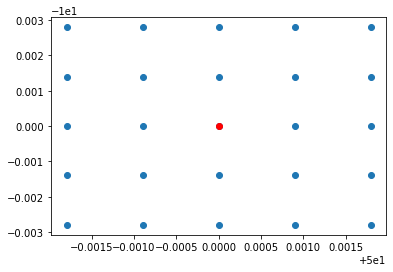

In [354]:
points = output.reshape(-1,2)
x = points[:,0]
y = points[:,1]

plt.scatter(x,y)
plt.scatter(50,-10,color='r')

In [356]:
from datetime import datetime
import time

print(time.tzname)

date_time_str1 = '(2021,10,4)   (19,36,21)'
date_time_str2 = 'Mon Oct 4 11:13:08 2021'

print(date_time_str1)
print(date_time_str2)

date_time_obj = datetime.strptime(date_time_str1, '(%Y,%m,%d) (%H,%M,%S)')
print ("The date is", date_time_obj)

date_time_obj = datetime.strptime(date_time_str2, '%a %b %d %H:%M:%S %Y')
print ("The date is", date_time_obj)

('IST', 'IST')
(2021,10,4)   (19,36,21)
Mon Oct 4 11:13:08 2021
The date is 2021-10-04 19:36:21
The date is 2021-10-04 11:13:08


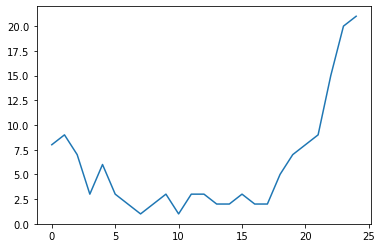

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

arr = np.array([8,9,7,3,6,3,2,1,2,3,1,3,3,2,2,3,2,2,5,7,8,9,15,20,21])

plt.plot(arr)
plt.show()

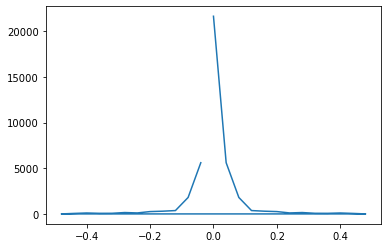

In [375]:
out = np.fft.fft(arr)
power = np.abs(out)**2
freq = np.fft.fftfreq(arr.shape[-1])
plt.plot(freq, power)

In [379]:
l = ['1152x864', '1920x1080', '1600x900', '1280x1024', '1024x768', '640x480', '720x400', '800x600']

sorted(l, key=lambda x: int(x.split('x')[0])/int(x.split('x')[1]), reverse=True)

sorted(l, key=lambda x: int(x.split('x')[0])*int(x.split('x')[1]), reverse=True)

sorted(l, key=lambda x: (int(x.split('x')[0])**2+int(x.split('x')[1])**2)**(1/2), reverse=True)

['1920x1080',
 '1600x900',
 '1280x1024',
 '1152x864',
 '1024x768',
 '800x600',
 '720x400',
 '640x480']

['1920x1080',
 '1600x900',
 '1280x1024',
 '1152x864',
 '1024x768',
 '800x600',
 '640x480',
 '720x400']

['1920x1080',
 '1600x900',
 '1280x1024',
 '1152x864',
 '1024x768',
 '800x600',
 '720x400',
 '640x480']

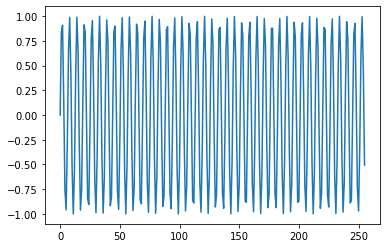

In [361]:
t = np.arange(256)
plt.plot(np.sin(t))

In [ ]:
import matplotlib.pyplot as plt

sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)

In [387]:
l = [[1,2,3]]

In [388]:
for i in l:
    print(l[1:]and[l[0]+l[-1]])

[]


array([[-2, -3, -4, -5],
       [-6, -7, -8, -9]])

In [396]:
d = {'key1' : {('key2','key3') : 'value'}}

{k:{vk[0]:{vk[1]:vv}} for k,v in d.items() for vk, vv in v.items()}

{'key1': {'key2': {'key3': 'value'}}}

In [402]:
a = np.array([0,0,1,1], dtype=bool)
b = np.array([0,1,0,1], dtype=bool)

~a|b

array([ True,  True, False,  True])

In [433]:
mat = np.random.binomial(1,.5,4)
rmat = np.array([mat,]*4) 

In [439]:
diag = rmat.diagonal()
np.fill_diagonal(rmat, np.logical_not(diag))
print(rmat)

[[0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]]


In [434]:
diagonal = rmat.diagonal()
np.fill_diagonal(rmat, 1-diagonal)
rmat

array([[1, 0, 1, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [455]:
n = rmat.shape[0]np.eye(n, dtype=bool)

TypeError: 'list' object cannot be interpreted as an integer

In [459]:
n = rmat.shape[0]
np.where(np.eye(n, dtype=bool), np.logical_not(rmat), rmat)

ValueError: operands could not be broadcast together with shapes (2,4) (4,4) (4,4) 

In [461]:
print(rmat)
print('')
n = rmat.shape[0]
idx = np.diag_indices(n)

rmat[idx] = np.logical_not(rmat[idx])
print(rmat)

[[1 0 1 1]
 [0 1 1 1]
 [0 0 0 1]
 [0 0 1 0]]

[[0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]]


(array([0, 1, 2, 3]), array([0, 1, 2, 3]))

In [451]:
print(rmat)
print('')


inverted_diag = np.logical_not(rmat[np.eye(n, dtype=bool)])
diag = 

print(rmat)

[[0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]]

[[0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]]


In [449]:
odd → 501
even → 140
square → 961 (=312)
cube → 343 (=73)
prime → 113
composite → 999 (=37×3×3×3)

In [ ]:
odd, even, square, cube, prime or composite

In [475]:
odds = [i for i in range(1000) if i%2>0 and i>100 and i<999]
evens = [i for i in range(1000) if i%2==0 and i>100 and i<999]
square = [i**2 for i in range(1000) if i**2>100 and i**2<999]
cube = [i**3 for i in range(1000) if i**3>100 and i**3<999]
prime = [x for x in range(100, 1000) if all(x % y != 0 for y in range(2, x))]
composite = list(set(range(100,1000)).difference(set(prime)))

In [ ]:
def loss(output):
    a,b,c,d,e,f = output
    

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1]])